In [1]:
import os
os.chdir('../')
from python_code import gibbs_sampler as gs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.style as style
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
style.use('ggplot')
from itertools import combinations

In [2]:
df = pd.read_csv('../data/mathtest.csv')
df.columns = ['group', 'values']

In [3]:
gibbs = gs.GibbsSampler(df, n_iter=5000, burn=100)

In [4]:
gibbs.fit()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:06<00:00, 799.38it/s]


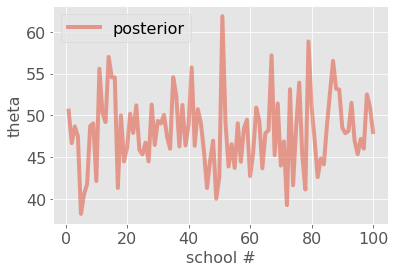

In [5]:
group = df.groupby('group')
plt.plot(np.unique(df['group']),gibbs.traces['theta'].mean(axis=0),alpha=.5, label='posterior')
plt.legend()
plt.xlabel('school #', fontsize=16)
plt.ylabel('theta', fontsize=16);

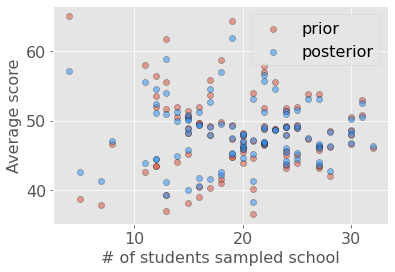

In [6]:
plt.scatter(group.size(), group.mean(), alpha=.5, edgecolor='black', label='prior');
plt.scatter(group.size(), gibbs.traces['theta'].mean(axis=0), color='dodgerblue', alpha=.5, edgecolor='black', label='posterior');
plt.xlabel('# of students sampled school', fontsize=16)
plt.legend()
plt.ylabel('Average score', fontsize=16);

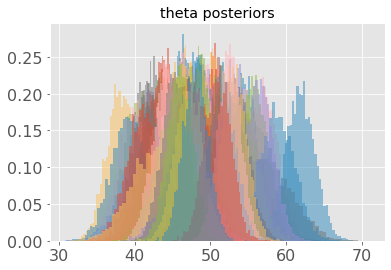

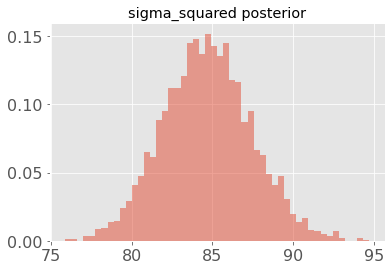

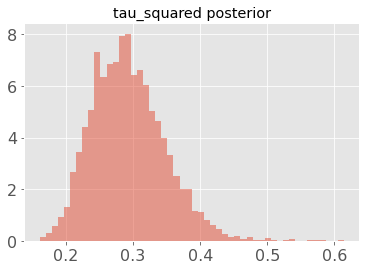

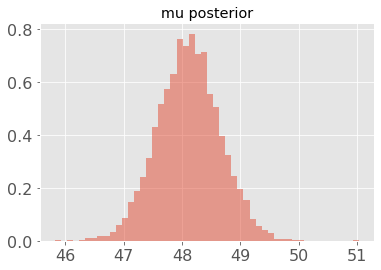

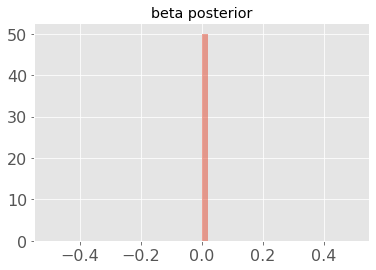

<Figure size 432x288 with 0 Axes>

In [7]:
gibbs.plot_all_posteriors();

In [8]:
group_means = group.mean().to_numpy().flatten()
k_i = np.abs(( gibbs.traces['theta'] - group_means)/group_means).mean(axis=0)

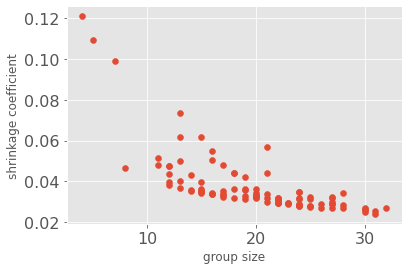

In [9]:
plt.scatter(group.size(), k_i)
plt.xlabel('group size')
plt.ylabel('shrinkage coefficient');

In [10]:
mu = gibbs.traces['mu'].mean()
cov_schools = np.zeros(gibbs.P)
for school in range(gibbs.P):
    all_idx = list(range(gibbs.n_i[school]))
    combs = list(combinations(all_idx, 2))
    combs_not_identical = [comb for comb in combs if combs[0] != combs[1]]
    rows = df[df['group'] == school + 1].reset_index()['values']
    terms = []
    for comb in combs_not_identical:
        terms.append((rows.iloc[comb[0]]-mu) * (rows.iloc[comb[1]]-mu))
    cov_schools[school] = np.mean(terms)

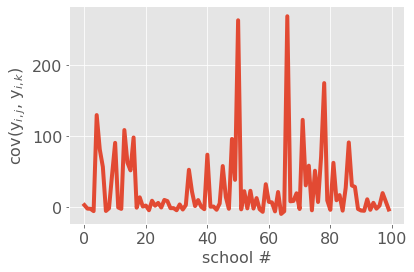

In [11]:
plt.plot(cov_schools)
plt.xlabel('school #', fontsize=16)
plt.ylabel('cov(y$_{i,j}$, y$_{i,k}$)', fontsize=16);

In [12]:
all_idx = list(range(gibbs.P))
combs = list(combinations(all_idx, 2))
combs_not_identical = [comb for comb in combs if combs[0] != combs[1]]
terms = []
for comb in combs_not_identical:
    terms.append((cov_schools[comb[0]] - mu)*(cov_schools[comb[0]] - mu))
cov = np.mean(terms)

In [13]:
cov

2733.3013879198797

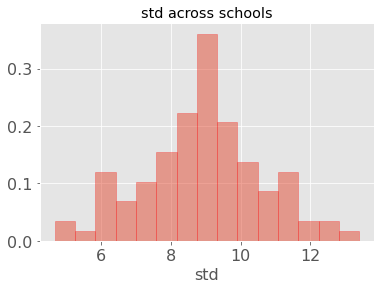

In [14]:
plt.hist(group.std(), alpha=0.5, edgecolor='red', bins=15, density=True);
plt.title('std across schools');
plt.xlabel('std', fontsize=16);